In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1= pd.read_excel('ThinkRobots_2019.xlsx', sheet_name='Customer Segments')
df2= pd.read_excel('ThinkRobots_2019.xlsx', sheet_name='Customer Names')
df3= pd.read_excel('ThinkRobots_2019.xlsx', sheet_name='Billing Status')
df4= pd.read_excel('ThinkRobots_2019.xlsx',sheet_name='Major Product Changes')


In [3]:
display(df1.head(), df3.head(), df2.head(),df4)

,Customer ID,Free Account Created Date,Last Seen,Session Count,Segment,Billing Account #
0,1,2017-05-29,2019-04-05 08:02:32,1379,Marketing Segment 2,AX#93195
1,2,2017-12-17,2019-04-27 13:23:56,531,Marketing Segment 1,AX#20438
2,3,2017-01-30,2019-04-22 15:38:09,317,Marketing Segment 1,AX#60779
3,4,2017-02-03,2019-04-23 16:30:46,349,Marketing Segment 1,AX#91209
4,5,2017-03-18,2019-04-05 13:16:33,1158,Marketing Segment 2,AX#57000


,Billing Account,Account Status,Upgraded Account Created Date,Upgraded Account Cancelled Date,Total Charges
0,AX#10042,paying,2019-03-20,NaT,332.800000
1,AX#10114,paying,2019-01-17,NaT,451.133333
2,AX#10259,paying,2018-09-28,NaT,1886.800000
3,AX#10695,paying,2018-12-21,NaT,797.866667
4,AX#10855,paying,2019-04-01,NaT,189.000000


,Customer ID,First Name
0,1,Joshua
1,2,Ka
2,3,Clint
3,4,Hong
4,5,Kate


,Release Date,Release Description
0,2017-06-28,V2 released
1,2018-11-13,Product pricing changed
2,2018-11-14,V3 released


In [4]:
df5= df1.merge(df2, how='inner',on='Customer ID')
df6=df5.merge(df3, how='left',left_on='Billing Account #',right_on='Billing Account')
df6.head()

,Customer ID,Free Account Created Date,Last Seen,Session Count,Segment,Billing Account #,First Name,Billing Account,Account Status,Upgraded Account Created Date,Upgraded Account Cancelled Date,Total Charges
0,1,2017-05-29,2019-04-05 08:02:32,1379,Marketing Segment 2,AX#93195,Joshua,AX#93195,paying,2019-04-02,NaT,145.600000
1,2,2017-12-17,2019-04-27 13:23:56,531,Marketing Segment 1,AX#20438,Ka,AX#20438,paying,2018-11-11,NaT,728.000000
2,3,2017-01-30,2019-04-22 15:38:09,317,Marketing Segment 1,AX#60779,Clint,AX#60779,paying,2019-03-15,NaT,277.200000
3,4,2017-02-03,2019-04-23 16:30:46,349,Marketing Segment 1,AX#91209,Hong,AX#91209,paying,2019-03-24,NaT,292.833333
4,5,2017-03-18,2019-04-05 13:16:33,1158,Marketing Segment 2,AX#57000,Kate,AX#57000,paying,2018-10-12,NaT,462.000000


In [5]:
df=df6.drop('Billing Account #', axis=1)

In [6]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Release Date         3 non-null      datetime64[ns]
 1   Release Description  3 non-null      object        
dtypes: datetime64[ns](1), object(1)
memory usage: 176.0+ bytes


In [7]:
df['Upgraded Time']=''
for i in range(len(df)):
    if df['Free Account Created Date'][i]<df4['Release Date'][0]:
        df['Upgraded Time'][i]='V1 Released'
    elif df['Free Account Created Date'][i]<df4['Release Date'][2]:
        df['Upgraded Time'][i]='V2 Released'
    else:
        df['Upgraded Time'][i]='V3 Released'


In [8]:
df['Price change']=''
for i in range(len(df)):
    if df['Free Account Created Date'][i]<df4['Release Date'][1]:
        df['Price change'][i]=0
    else:
        df['Price change'][i]=1

In [9]:
df

,Customer ID,Free Account Created Date,Last Seen,Session Count,Segment,First Name,Billing Account,Account Status,Upgraded Account Created Date,Upgraded Account Cancelled Date,Total Charges,Upgraded Time,Price change
0,1,2017-05-29,2019-04-05 08:02:32,1379,Marketing Segment 2,Joshua,AX#93195,paying,2019-04-02,NaT,145.600000,V1 Released,0
1,2,2017-12-17,2019-04-27 13:23:56,531,Marketing Segment 1,Ka,AX#20438,paying,2018-11-11,NaT,728.000000,V2 Released,0
2,3,2017-01-30,2019-04-22 15:38:09,317,Marketing Segment 1,Clint,AX#60779,paying,2019-03-15,NaT,277.200000,V1 Released,0
3,4,2017-02-03,2019-04-23 16:30:46,349,Marketing Segment 1,Hong,AX#91209,paying,2019-03-24,NaT,292.833333,V1 Released,0
4,5,2017-03-18,2019-04-05 13:16:33,1158,Marketing Segment 2,Kate,AX#57000,paying,2018-10-12,NaT,462.000000,V1 Released,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,996,2019-04-25,2019-04-28 16:55:00,1,Marketing Segment 2,Garnet,AX#88630,paying,2019-04-25,NaT,21.200000,V3 Released,1
1010,997,2019-04-26,2019-04-26 20:09:02,0,Marketing Segment 2,Claribel,AX#53242,paying,2019-04-27,NaT,6.833333,V3 Released,1
1011,998,2019-04-27,2019-04-27 20:52:36,1,Marketing Segment 3,Porsha,AX#50772,paying,2019-04-27,NaT,4.733333,V3 Released,1
1012,999,2019-04-28,2019-04-28 15:56:51,0,Marketing Segment 1,Emma,AX#75078,paying,2019-04-28,NaT,0.000000,V3 Released,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014 entries, 0 to 1013
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Customer ID                      1014 non-null   int64         
 1   Free Account Created Date        1014 non-null   datetime64[ns]
 2   Last Seen                        1014 non-null   datetime64[ns]
 3   Session Count                    1014 non-null   int64         
 4   Segment                          1014 non-null   object        
 5   First Name                       1014 non-null   object        
 6   Billing Account                  1014 non-null   object        
 7   Account Status                   1014 non-null   object        
 8   Upgraded Account Created Date    1014 non-null   datetime64[ns]
 9   Upgraded Account Cancelled Date  123 non-null    datetime64[ns]
 10  Total Charges                    1014 non-null   float64    

In [11]:
df.describe()

,Customer ID,Session Count,Total Charges
count,1014.000000,1014.000000,1014.000000
mean,499.017751,309.584813,560.846910
std,288.964581,2126.138216,705.709395
min,1.000000,0.000000,0.000000
25%,248.250000,2.000000,107.075000
50%,499.500000,11.000000,282.350000
75%,747.750000,56.250000,734.858333
max,1000.000000,51169.000000,4430.266667


In [12]:
df.isnull().sum()

Customer ID                          0
Free Account Created Date            0
Last Seen                            0
Session Count                        0
Segment                              0
First Name                           0
Billing Account                      0
Account Status                       0
Upgraded Account Created Date        0
Upgraded Account Cancelled Date    891
Total Charges                        0
Upgraded Time                        0
Price change                         0
dtype: int64

In [447]:
df.groupby('Account Status')['Total Charges'].sum().reset_index()

,Account Status,Total Charges
0,cancelled,57064.100000
1,paying,511634.666667


In [16]:
import plotly.graph_objects as go

labels = ['Cancelled','Paying']
values = df.groupby('Account Status')['Total Charges'].sum().values
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent'
                            )])
fig.update_layout(title_text='Percent cancelled and paying in total charges')
fig.show()

Cancelled chiếm 10% trên tổng số Total Chages.

In [17]:
df_cancelled=df[df['Account Status']=='cancelled']
df_cancelled.head()

,Customer ID,Free Account Created Date,Last Seen,Session Count,Segment,First Name,Billing Account,Account Status,Upgraded Account Created Date,Upgraded Account Cancelled Date,Total Charges,Upgraded Time,Price change
8,9,2017-05-28,2017-12-18 15:19:31,18,Marketing Segment 3,Garfield,AX#48539,cancelled,2018-04-09,2018-08-22,1107.000000,V1 Released,0
21,21,2017-08-15,2019-04-24 11:07:32,26,Marketing Segment 3,Jenny,AX#32025,cancelled,2018-04-24,2018-12-10,529.000000,V2 Released,0
26,26,2017-10-15,2018-12-29 12:04:00,85,Marketing Segment 2,Susanna,AX#47437,cancelled,2018-04-09,2018-10-30,1373.600000,V2 Released,0
28,28,2017-10-17,2018-02-04 13:07:56,0,Marketing Segment 3,Marlena,AX#63705,cancelled,2018-04-09,2018-08-29,923.000000,V2 Released,0
32,32,2017-10-21,2018-12-18 16:41:38,93,Marketing Segment 2,Desire,AX#23324,cancelled,2018-04-09,2018-12-19,499.533333,V2 Released,0


In [18]:
fig = go.Figure()

fig.add_trace(go.Violin(y=df['Total Charges'][ df['Account Status'] == 'paying' ],
                        legendgroup='paying', scalegroup='paying', name='paying',                      
                        line_color='blue')
             )
fig.add_trace(go.Violin(y=df['Total Charges'][ df['Account Status'] == 'cancelled' ],
                        legendgroup='cancel', scalegroup='cancel', name='cancel',                   
                        line_color='orange')
             )
fig.show()


Hầu hết các khách hàng cancel thường có Total Charges nhỏ hơn 1000 nhưng có thể thấy giá trị Total Charges không ảnh hưởng nhiều đến việc cancelled vì những khách hàng paying cũng tập trung dưới 1000

In [19]:
df_count_for_vesion= df.groupby('Upgraded Time')['Customer ID'].nunique()
df_count_for_vesion

Upgraded Time
V1 Released     13
V2 Released    385
V3 Released    602
Name: Customer ID, dtype: int64

In [20]:
df['Year_month']=df['Free Account Created Date'].dt.to_period('M')
df.head()

,Customer ID,Free Account Created Date,Last Seen,Session Count,Segment,First Name,Billing Account,Account Status,Upgraded Account Created Date,Upgraded Account Cancelled Date,Total Charges,Upgraded Time,Price change,Year_month
0,1,2017-05-29,2019-04-05 08:02:32,1379,Marketing Segment 2,Joshua,AX#93195,paying,2019-04-02,NaT,145.600000,V1 Released,0,2017-05
1,2,2017-12-17,2019-04-27 13:23:56,531,Marketing Segment 1,Ka,AX#20438,paying,2018-11-11,NaT,728.000000,V2 Released,0,2017-12
2,3,2017-01-30,2019-04-22 15:38:09,317,Marketing Segment 1,Clint,AX#60779,paying,2019-03-15,NaT,277.200000,V1 Released,0,2017-01
3,4,2017-02-03,2019-04-23 16:30:46,349,Marketing Segment 1,Hong,AX#91209,paying,2019-03-24,NaT,292.833333,V1 Released,0,2017-02
4,5,2017-03-18,2019-04-05 13:16:33,1158,Marketing Segment 2,Kate,AX#57000,paying,2018-10-12,NaT,462.000000,V1 Released,0,2017-03


In [21]:
import plotly.express as px
fig = px.scatter(df, x="Session Count", y="Total Charges",color='Account Status',
                  hover_data=['Account Status'],size='Total Charges')
                  
fig.update_layout(title_text='Cancelled and Paying follow Session Count ')
fig.show()

Hầu hết các khách hàng cancelled thường ít đăng nhập vào hệ thống thường sẽ ít hơn 267 lần đăng nhập.

In [124]:
df_time_version=df.groupby(['Year_month','Upgraded Time','Account Status'])['Customer ID'].nunique().to_frame()



In [201]:
df_time_version

,Year_month,Upgraded Time,Account Status,Customer ID
0,2017-01,V1 Released,paying,1
1,2017-02,V1 Released,paying,1
2,2017-03,V1 Released,paying,2
3,2017-05,V1 Released,cancelled,1
4,2017-05,V1 Released,paying,4
5,2017-06,V1 Released,paying,4
6,2017-07,V2 Released,paying,5
7,2017-08,V2 Released,cancelled,1
8,2017-08,V2 Released,paying,1
9,2017-09,V2 Released,paying,2


In [263]:
data2=df_time_version.groupby(['Upgraded Time','Account Status'])['Customer ID'].sum().reset_index()
data2

,Upgraded Time,Account Status,Customer ID
0,V1 Released,cancelled,1
1,V1 Released,paying,12
2,V2 Released,cancelled,101
3,V2 Released,paying,286
4,V3 Released,cancelled,21
5,V3 Released,paying,581


In [316]:
import plotly.graph_objects as go
animals=data2['Upgraded Time'].unique()

fig = go.Figure(data=[
    go.Bar(name='cancelled', x=animals, y=data2.loc[data2['Account Status']=='cancelled','Customer ID'],marker_color='crimson'
            ),
    go.Bar(name='paying', x=animals, y=data2.loc[data2['Account Status']=='paying','Customer ID'],marker_color='green')])


fig.update_layout(barmode='group')
fig.update_layout(title_text='Total cancelled and paying in versions',xaxis_title="Version",
    yaxis_title="Total customer")
fig.show()

Nhưng khách hàng sử dụng V2 Released có mức cancelled tăng khá cao tuy nhiên thì lượng khách hàng paying cũng tăng đáng kể. Dối với khách hàng V3 Released thì có vẻ ổn hơn lượng khách hàng cancelled giảm đáng kể và lượng khách hàng paying tăng cao có thể thấy V3 Released được khách hàng hài lòng và yêu thích.

In [220]:
data1=df.groupby(['Price change','Account Status'])['Customer ID'].count().to_frame().reset_index()
data1['Price change']=data1['Price change'].map({0:"No Price Change",1:"Price Change"})
data1

,Price change,Account Status,Customer ID
0,No Price Change,cancelled,101
1,No Price Change,paying,304
2,Price Change,cancelled,22
3,Price Change,paying,587


In [317]:
import plotly.graph_objects as go
animals=data1['Price change'].unique()

fig = go.Figure(data=[
    go.Bar(name='cancelled', x=animals, y=data1.loc[data1['Account Status']=='cancelled','Customer ID'],marker_color='crimson'
            ),
    go.Bar(name='paying', x=animals, y=data1.loc[data1['Account Status']=='paying','Customer ID'],marker_color='green')])


fig.update_layout(barmode='group')
fig.update_layout(title_text='Paying and Cancelled after price changes',xaxis_title="Price Changes",
    yaxis_title="Total customer")
fig.show()

Việc thay đổi giá có thể đã làm giảm lượng khách hàng cancelled và giúp tăng lượng khách hàng paying đáng kể. có thể lần thay đổi giá này đang giảm hơn so với lúc trước vì vậy số khách hàng cancelled giảm đi hẳn và số khách hàng paying tăng rất nhiều gần gấp đôi so với trước khi Price Changes


In [445]:
df.head()

,Customer ID,Free Account Created Date,Last Seen,Session Count,Segment,First Name,Billing Account,Account Status,Upgraded Account Created Date,Upgraded Account Cancelled Date,Total Charges,Upgraded Time,Price change,Distance Upgraded from Create Free
0,1,2017-05-29,2019-04-05 08:02:32,1379,Marketing Segment 2,Joshua,AX#93195,paying,2019-04-02,NaT,145.600000,V1 Released,0,673
1,2,2017-12-17,2019-04-27 13:23:56,531,Marketing Segment 1,Ka,AX#20438,paying,2018-11-11,NaT,728.000000,V2 Released,0,329
2,3,2017-01-30,2019-04-22 15:38:09,317,Marketing Segment 1,Clint,AX#60779,paying,2019-03-15,NaT,277.200000,V1 Released,0,774
3,4,2017-02-03,2019-04-23 16:30:46,349,Marketing Segment 1,Hong,AX#91209,paying,2019-03-24,NaT,292.833333,V1 Released,0,779
4,5,2017-03-18,2019-04-05 13:16:33,1158,Marketing Segment 2,Kate,AX#57000,paying,2018-10-12,NaT,462.000000,V1 Released,0,573


In [318]:
data3=df.groupby('Upgraded Time')['Session Count'].sum().reset_index()
animals=data3['Upgraded Time'].unique()

fig = go.Figure([go.Bar(x=animals, y=data3['Session Count'])])
fig.update_layout(title_text='Total Session in Versions',xaxis_title="Version",
    yaxis_title="Total Session")
fig.show()

Biểu đồ thể hiện số lần truy cập vào hệ thống của V2 Released cao nhất có thể đây là phiên bản mới nên người dùng muốn trải nghiệm nhiều nhiều thứ mới hoặc trong thời gian này có chương trình gì đấy hot nên thu hút được lượt truy cập thường xuyên.

In [341]:
df['Distance Upgraded from Create Free']=(df['Upgraded Account Created Date']-df['Free Account Created Date']).dt.days
df.head(2)

,Customer ID,Free Account Created Date,Last Seen,Session Count,Segment,First Name,Billing Account,Account Status,Upgraded Account Created Date,Upgraded Account Cancelled Date,Total Charges,Upgraded Time,Price change,Distance Upgraded from Create Free
0,1,2017-05-29,2019-04-05 08:02:32,1379,Marketing Segment 2,Joshua,AX#93195,paying,2019-04-02,NaT,145.6,V1 Released,0,673
1,2,2017-12-17,2019-04-27 13:23:56,531,Marketing Segment 1,Ka,AX#20438,paying,2018-11-11,NaT,728.0,V2 Released,0,329


In [379]:
import plotly.express as px
fig = px.scatter(df, y="Account Status", x="Distance Upgraded from Create Free",color='Account Status',
                  hover_data=['Account Status'])
                  
fig.update_layout(title_text='Cancelled and Paying follow Session Count ')
fig.show()

Ta có thể thấy các khách hàng Upgraded Account nhanh thì khả năng cancelled cũng khá cao các tài khoản Upgraded thường nhỏ hơn 200 ngày kể từ ngày tạo Account Free.

In [372]:
df_cancelled=df[df['Account Status']=='cancelled'].reset_index(drop=True)
df_cancelled.dropna(inplace=True)


In [373]:
df_cancelled

,Customer ID,Free Account Created Date,Last Seen,Session Count,Segment,First Name,Billing Account,Account Status,Upgraded Account Created Date,Upgraded Account Cancelled Date,Total Charges,Upgraded Time,Price change,Distance Upgraded from Create Free
0,9,2017-05-28,2017-12-18 15:19:31,18,Marketing Segment 3,Garfield,AX#48539,cancelled,2018-04-09,2018-08-22,1107.000000,V1 Released,0,316
1,21,2017-08-15,2019-04-24 11:07:32,26,Marketing Segment 3,Jenny,AX#32025,cancelled,2018-04-24,2018-12-10,529.000000,V2 Released,0,252
2,26,2017-10-15,2018-12-29 12:04:00,85,Marketing Segment 2,Susanna,AX#47437,cancelled,2018-04-09,2018-10-30,1373.600000,V2 Released,0,176
3,28,2017-10-17,2018-02-04 13:07:56,0,Marketing Segment 3,Marlena,AX#63705,cancelled,2018-04-09,2018-08-29,923.000000,V2 Released,0,174
4,32,2017-10-21,2018-12-18 16:41:38,93,Marketing Segment 2,Desire,AX#23324,cancelled,2018-04-09,2018-12-19,499.533333,V2 Released,0,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,567,2019-01-13,2019-02-10 16:40:41,0,Marketing Segment 3,Reva,AX#78755,cancelled,2019-01-15,2019-02-10,246.133333,V3 Released,1,2
118,592,2019-01-20,2019-02-11 05:38:13,1,Marketing Segment 2,Sherrill,AX#22339,cancelled,2019-02-10,2019-05-13,637.866667,V3 Released,1,21
119,594,2019-01-21,2019-04-28 19:22:05,4,Marketing Segment 3,Joeann,AX#46289,cancelled,2019-02-17,2019-02-22,17.833333,V3 Released,1,27
120,599,2019-01-23,2019-04-27 17:24:41,5,Marketing Segment 1,Abraham,AX#88573,cancelled,2019-01-23,2019-03-19,458.333333,V3 Released,1,0


In [374]:
df_cancelled['Distance Time Cancel from Upgraded']=(df_cancelled['Upgraded Account Cancelled Date']-df_cancelled['Upgraded Account Created Date']).dt.days
df_cancelled.astype({'Distance Time Cancel from Upgraded':'int'})
df_cancelled


,Customer ID,Free Account Created Date,Last Seen,Session Count,Segment,First Name,Billing Account,Account Status,Upgraded Account Created Date,Upgraded Account Cancelled Date,Total Charges,Upgraded Time,Price change,Distance Upgraded from Create Free,Distance Time Cancel from Upgraded
0,9,2017-05-28,2017-12-18 15:19:31,18,Marketing Segment 3,Garfield,AX#48539,cancelled,2018-04-09,2018-08-22,1107.000000,V1 Released,0,316,135
1,21,2017-08-15,2019-04-24 11:07:32,26,Marketing Segment 3,Jenny,AX#32025,cancelled,2018-04-24,2018-12-10,529.000000,V2 Released,0,252,230
2,26,2017-10-15,2018-12-29 12:04:00,85,Marketing Segment 2,Susanna,AX#47437,cancelled,2018-04-09,2018-10-30,1373.600000,V2 Released,0,176,204
3,28,2017-10-17,2018-02-04 13:07:56,0,Marketing Segment 3,Marlena,AX#63705,cancelled,2018-04-09,2018-08-29,923.000000,V2 Released,0,174,142
4,32,2017-10-21,2018-12-18 16:41:38,93,Marketing Segment 2,Desire,AX#23324,cancelled,2018-04-09,2018-12-19,499.533333,V2 Released,0,170,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,567,2019-01-13,2019-02-10 16:40:41,0,Marketing Segment 3,Reva,AX#78755,cancelled,2019-01-15,2019-02-10,246.133333,V3 Released,1,2,26
118,592,2019-01-20,2019-02-11 05:38:13,1,Marketing Segment 2,Sherrill,AX#22339,cancelled,2019-02-10,2019-05-13,637.866667,V3 Released,1,21,92
119,594,2019-01-21,2019-04-28 19:22:05,4,Marketing Segment 3,Joeann,AX#46289,cancelled,2019-02-17,2019-02-22,17.833333,V3 Released,1,27,5
120,599,2019-01-23,2019-04-27 17:24:41,5,Marketing Segment 1,Abraham,AX#88573,cancelled,2019-01-23,2019-03-19,458.333333,V3 Released,1,0,55


In [377]:
import plotly.express as px
fig = px.scatter(df_cancelled, x="Distance Time Cancel from Upgraded",color='Account Status',
                  hover_data=['Account Status'])
                  
fig.update_layout(title_text='Distance Time From Upgraded Customer Cancelled ')
fig.show()

Sau khi Upgraded Account những khách hàng cancelled nhiều trong khoảng thấp hơn 100 kể từ ngày Upgraded.

In [382]:
df.head()

,Customer ID,Free Account Created Date,Last Seen,Session Count,Segment,First Name,Billing Account,Account Status,Upgraded Account Created Date,Upgraded Account Cancelled Date,Total Charges,Upgraded Time,Price change,Distance Upgraded from Create Free
0,1,2017-05-29,2019-04-05 08:02:32,1379,Marketing Segment 2,Joshua,AX#93195,paying,2019-04-02,NaT,145.600000,V1 Released,0,673
1,2,2017-12-17,2019-04-27 13:23:56,531,Marketing Segment 1,Ka,AX#20438,paying,2018-11-11,NaT,728.000000,V2 Released,0,329
2,3,2017-01-30,2019-04-22 15:38:09,317,Marketing Segment 1,Clint,AX#60779,paying,2019-03-15,NaT,277.200000,V1 Released,0,774
3,4,2017-02-03,2019-04-23 16:30:46,349,Marketing Segment 1,Hong,AX#91209,paying,2019-03-24,NaT,292.833333,V1 Released,0,779
4,5,2017-03-18,2019-04-05 13:16:33,1158,Marketing Segment 2,Kate,AX#57000,paying,2018-10-12,NaT,462.000000,V1 Released,0,573


In [391]:
df_paying=df[df['Account Status']=='paying']
df_total_segment= df_paying.groupby(['Segment'])['Total Charges'].sum().reset_index()
df_total_segment

,Segment,Total Charges
0,Marketing Segment 1,165752.800000
1,Marketing Segment 2,204805.366667
2,Marketing Segment 3,141076.500000


In [396]:
import plotly.graph_objects as go
labels = df_total_segment['Segment'].values
values = df_paying.groupby(['Segment'])['Total Charges'].sum()
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='percent'
                            )])
fig.update_layout(title_text='Percent paying in total charges of segment')
fig.show()

Bộ phận Marketing 2 có doanh số Total Charges cao nhất chiếm 40% với tổng doanh số là 204805,3$, theo sau  là Marketing 1 chiếm 32,4% với tổng doanh số 165752,8$ cuối cùng là Marketing 3 chiếm 27,6% với tổng doanh số 141076,5$

In [439]:
df_segment_total_charges=df.groupby(['Segment','Account Status'])['Total Charges'].sum().reset_index()
df_segment_total_charges=df_segment_total_charges.sort_values(by='Segment')
df_segment_total_charges

,Segment,Account Status,Total Charges
0,Marketing Segment 1,cancelled,7104.566667
1,Marketing Segment 1,paying,165752.800000
2,Marketing Segment 2,cancelled,25536.000000
3,Marketing Segment 2,paying,204805.366667
4,Marketing Segment 3,cancelled,24423.533333
5,Marketing Segment 3,paying,141076.500000


In [441]:
fig = px.bar(df_segment_total_charges, x="Total Charges", y="Segment", color="Account Status",color_discrete_map={"paying": "green",  "cancelled": "red"})
fig.update_layout( title_text='Total Charges Cancelled and Paying by Segment')
fig.show()

Bộ phận Marketing 2,3 có Total Charges khá nhiều so với Marketing 1.

In [422]:
df_segment_account_status=df.groupby(['Segment','Account Status'])['Customer ID'].count().reset_index()
df_segment_account_status=df_segment_account_status.sort_values(by='Segment', ascending=False)
df_segment_account_status

,Segment,Account Status,Customer ID
4,Marketing Segment 3,cancelled,48
5,Marketing Segment 3,paying,301
2,Marketing Segment 2,cancelled,57
3,Marketing Segment 2,paying,350
0,Marketing Segment 1,cancelled,18
1,Marketing Segment 1,paying,240


In [442]:
fig = px.bar(df_segment_account_status, x="Customer ID", y="Segment", color="Account Status",color_discrete_map={"paying": "green",  "cancelled": "red"})
fig.update_layout( title_text='Total Customer Cancelled and Paying by Segment')
fig.show()

Qua biểu đồ ta có thể thấy được bộ phận Marketing 1 làm việc ổn nhất tuy có số khách hàng và Total Charges không cao nhất nhưng tỷ lệ giữ chân khách hàng tốt nhất cũng như có doanh số ổn định. Còn đối với Marketing 3 thì khá tệ vì cả tỷ lệ doanh thu Total Charges thấp nhất và tỷ lệ khách hàng cancelled khá cao.

In [443]:
df.head()

,Customer ID,Free Account Created Date,Last Seen,Session Count,Segment,First Name,Billing Account,Account Status,Upgraded Account Created Date,Upgraded Account Cancelled Date,Total Charges,Upgraded Time,Price change,Distance Upgraded from Create Free
0,1,2017-05-29,2019-04-05 08:02:32,1379,Marketing Segment 2,Joshua,AX#93195,paying,2019-04-02,NaT,145.600000,V1 Released,0,673
1,2,2017-12-17,2019-04-27 13:23:56,531,Marketing Segment 1,Ka,AX#20438,paying,2018-11-11,NaT,728.000000,V2 Released,0,329
2,3,2017-01-30,2019-04-22 15:38:09,317,Marketing Segment 1,Clint,AX#60779,paying,2019-03-15,NaT,277.200000,V1 Released,0,774
3,4,2017-02-03,2019-04-23 16:30:46,349,Marketing Segment 1,Hong,AX#91209,paying,2019-03-24,NaT,292.833333,V1 Released,0,779
4,5,2017-03-18,2019-04-05 13:16:33,1158,Marketing Segment 2,Kate,AX#57000,paying,2018-10-12,NaT,462.000000,V1 Released,0,573


In [450]:
df_paying['Year_paying']=df_paying['Upgraded Account Created Date'].dt.year
df_paying

,Customer ID,Free Account Created Date,Last Seen,Session Count,Segment,First Name,Billing Account,Account Status,Upgraded Account Created Date,Upgraded Account Cancelled Date,Total Charges,Upgraded Time,Price change,Distance Upgraded from Create Free,Year_paying
0,1,2017-05-29,2019-04-05 08:02:32,1379,Marketing Segment 2,Joshua,AX#93195,paying,2019-04-02,NaT,145.600000,V1 Released,0,673,2019
1,2,2017-12-17,2019-04-27 13:23:56,531,Marketing Segment 1,Ka,AX#20438,paying,2018-11-11,NaT,728.000000,V2 Released,0,329,2018
2,3,2017-01-30,2019-04-22 15:38:09,317,Marketing Segment 1,Clint,AX#60779,paying,2019-03-15,NaT,277.200000,V1 Released,0,774,2019
3,4,2017-02-03,2019-04-23 16:30:46,349,Marketing Segment 1,Hong,AX#91209,paying,2019-03-24,NaT,292.833333,V1 Released,0,779,2019
4,5,2017-03-18,2019-04-05 13:16:33,1158,Marketing Segment 2,Kate,AX#57000,paying,2018-10-12,NaT,462.000000,V1 Released,0,573,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,996,2019-04-25,2019-04-28 16:55:00,1,Marketing Segment 2,Garnet,AX#88630,paying,2019-04-25,NaT,21.200000,V3 Released,1,0,2019
1010,997,2019-04-26,2019-04-26 20:09:02,0,Marketing Segment 2,Claribel,AX#53242,paying,2019-04-27,NaT,6.833333,V3 Released,1,1,2019
1011,998,2019-04-27,2019-04-27 20:52:36,1,Marketing Segment 3,Porsha,AX#50772,paying,2019-04-27,NaT,4.733333,V3 Released,1,0,2019
1012,999,2019-04-28,2019-04-28 15:56:51,0,Marketing Segment 1,Emma,AX#75078,paying,2019-04-28,NaT,0.000000,V3 Released,1,0,2019


In [484]:
df_paying.groupby('Year_paying')['Total Charges'].count().reset_index()

,Year_paying,Total Charges
0,2017,5
1,2018,323
2,2019,563


In [471]:
df_total_charges_paying=round(df_paying.groupby('Year_paying')['Total Charges'].sum().reset_index(),2)
df_total_charges_paying

,Year_paying,Total Charges
0,2017,15181.53
1,2018,375710.70
2,2019,120742.43


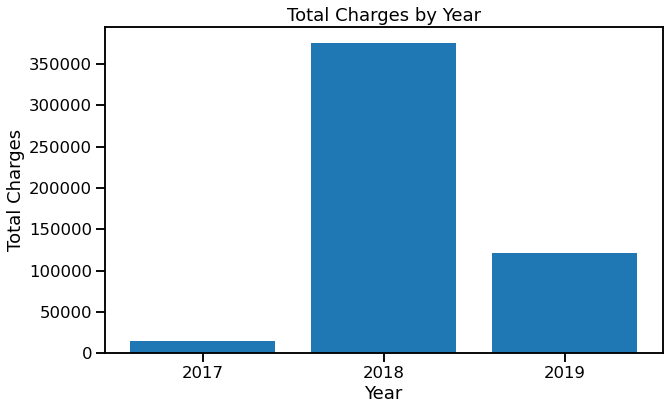

In [482]:
plt.figure(figsize=(10,6))
height = df_total_charges_paying['Total Charges']
bars = df_total_charges_paying['Year_paying']
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.title('Total Charges by Year')
plt.xlabel('Year')
plt.ylabel('Total Charges')
plt.show()

Total Chages 2018 cao nhất tuy lượng khách hàng paying không nhiều bằng năm 2019 nhưng giá trị paying cao hơn vì vậy dẫn đến 2019 có khác nhiều khách hàng paying nhưng charges thấp hơn 2018. 

Churn Predict Customer 

In [485]:
feature=df.copy()

In [490]:
feature

,Customer ID,Free Account Created Date,Last Seen,Session Count,Segment,First Name,Billing Account,Account Status,Upgraded Account Created Date,Upgraded Account Cancelled Date,Total Charges,Upgraded Time,Price change,Distance Upgraded from Create Free,Year,cancel
0,1,2017-05-29,2019-04-05 08:02:32,1379,Marketing Segment 2,Joshua,AX#93195,paying,2019-04-02,NaT,145.600000,V1 Released,0,673,2019,1
1,2,2017-12-17,2019-04-27 13:23:56,531,Marketing Segment 1,Ka,AX#20438,paying,2018-11-11,NaT,728.000000,V2 Released,0,329,2018,1
2,3,2017-01-30,2019-04-22 15:38:09,317,Marketing Segment 1,Clint,AX#60779,paying,2019-03-15,NaT,277.200000,V1 Released,0,774,2019,1
3,4,2017-02-03,2019-04-23 16:30:46,349,Marketing Segment 1,Hong,AX#91209,paying,2019-03-24,NaT,292.833333,V1 Released,0,779,2019,1
4,5,2017-03-18,2019-04-05 13:16:33,1158,Marketing Segment 2,Kate,AX#57000,paying,2018-10-12,NaT,462.000000,V1 Released,0,573,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,996,2019-04-25,2019-04-28 16:55:00,1,Marketing Segment 2,Garnet,AX#88630,paying,2019-04-25,NaT,21.200000,V3 Released,1,0,2019,1
1010,997,2019-04-26,2019-04-26 20:09:02,0,Marketing Segment 2,Claribel,AX#53242,paying,2019-04-27,NaT,6.833333,V3 Released,1,1,2019,1
1011,998,2019-04-27,2019-04-27 20:52:36,1,Marketing Segment 3,Porsha,AX#50772,paying,2019-04-27,NaT,4.733333,V3 Released,1,0,2019,1
1012,999,2019-04-28,2019-04-28 15:56:51,0,Marketing Segment 1,Emma,AX#75078,paying,2019-04-28,NaT,0.000000,V3 Released,1,0,2019,1


In [538]:
feature['cancel']=feature['Account Status'].map({'paying':0, 'cancelled':1})

In [539]:
feature1=pd.get_dummies(df[['Segment','Upgraded Time']])
feature1.head()

,Segment_Marketing Segment 1,Segment_Marketing Segment 2,Segment_Marketing Segment 3,Upgraded Time_V1 Released,Upgraded Time_V2 Released,Upgraded Time_V3 Released
0,0,1,0,1,0,0
1,1,0,0,0,1,0
2,1,0,0,1,0,0
3,1,0,0,1,0,0
4,0,1,0,1,0,0


In [540]:
feature_final=pd.concat([feature1,feature[['Total Charges','Session Count','Price change','Distance Upgraded from Create Free','cancel']]], axis=1)
feature_final

,Segment_Marketing Segment 1,Segment_Marketing Segment 2,Segment_Marketing Segment 3,Upgraded Time_V1 Released,Upgraded Time_V2 Released,Upgraded Time_V3 Released,Total Charges,Session Count,Price change,Distance Upgraded from Create Free,cancel
0,0,1,0,1,0,0,145.600000,1379,0,673,0
1,1,0,0,0,1,0,728.000000,531,0,329,0
2,1,0,0,1,0,0,277.200000,317,0,774,0
3,1,0,0,1,0,0,292.833333,349,0,779,0
4,0,1,0,1,0,0,462.000000,1158,0,573,0
...,...,...,...,...,...,...,...,...,...,...,...
1009,0,1,0,0,0,1,21.200000,1,1,0,0
1010,0,1,0,0,0,1,6.833333,0,1,1,0
1011,0,0,1,0,0,1,4.733333,1,1,0,0
1012,1,0,0,0,0,1,0.000000,0,1,0,0


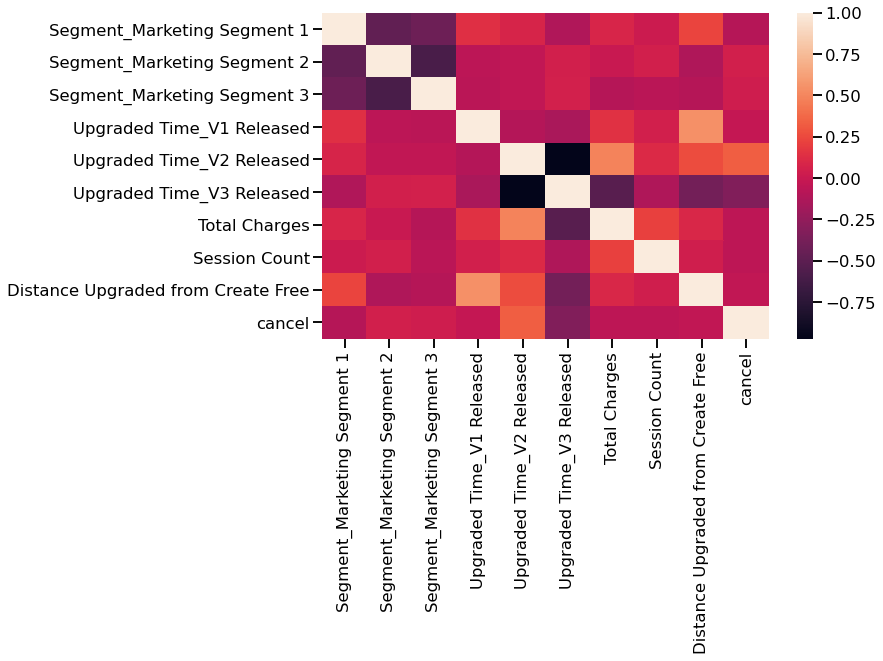

In [541]:
plt.figure(figsize=(10,6))
corr =feature_final.corr()
sns.heatmap(corr)

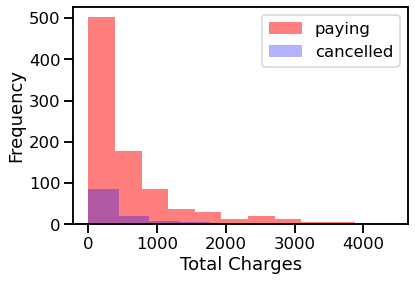

In [543]:
feature_final[feature_final['cancel']==0]['Total Charges'].plot(kind ='hist', alpha =0.5, color='red', label ='paying')
feature_final[feature_final['cancel']==1]['Total Charges'].plot(kind='hist', alpha =0.3, color='blue', label='cancelled')
plt.xlabel('Total Charges')
plt.legend()

In [546]:
X= feature_final.drop('cancel', axis=1)
y= feature_final['cancel']

Chuẩn hóa dữ liệu

In [547]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
x = X.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled_train = min_max_scaler.fit_transform(x)
df_train = pd.DataFrame(x_scaled_train)

In [548]:
df_train

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,1.0,0.0,0.0,0.032865,0.026950,0.0,0.902214
1,1.0,0.0,0.0,0.0,1.0,0.0,0.164324,0.010377,0.0,0.584871
2,1.0,0.0,0.0,1.0,0.0,0.0,0.062570,0.006195,0.0,0.995387
3,1.0,0.0,0.0,1.0,0.0,0.0,0.066098,0.006821,0.0,1.000000
4,0.0,1.0,0.0,1.0,0.0,0.0,0.104283,0.022631,0.0,0.809963
...,...,...,...,...,...,...,...,...,...,...
1009,0.0,1.0,0.0,0.0,0.0,1.0,0.004785,0.000020,1.0,0.281365
1010,0.0,1.0,0.0,0.0,0.0,1.0,0.001542,0.000000,1.0,0.282288
1011,0.0,0.0,1.0,0.0,0.0,1.0,0.001068,0.000020,1.0,0.281365
1012,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,1.0,0.281365


Chia du lieu train test

In [559]:
X_train, X_test, y_train, y_test = train_test_split(df_train,y, test_size=.2, random_state=42)

In [560]:
X_train

,0,1,2,3,4,5,6,7,8,9
847,0.0,1.0,0.0,0.0,0.0,1.0,0.042616,0.000547,1.0,0.281365
332,1.0,0.0,0.0,0.0,1.0,0.0,0.406296,0.000371,0.0,0.285055
707,0.0,1.0,0.0,0.0,0.0,1.0,0.018780,0.000117,1.0,0.282288
218,0.0,1.0,0.0,0.0,1.0,0.0,0.012415,0.000176,0.0,0.281365
425,0.0,1.0,0.0,0.0,0.0,1.0,0.135583,0.001055,1.0,0.344096
...,...,...,...,...,...,...,...,...,...,...
106,0.0,1.0,0.0,0.0,1.0,0.0,0.517689,0.000645,0.0,0.281365
270,0.0,1.0,0.0,0.0,1.0,0.0,0.241219,0.000293,0.0,0.367159
860,1.0,0.0,0.0,0.0,0.0,1.0,0.041645,0.000000,1.0,0.282288
435,1.0,0.0,0.0,0.0,0.0,1.0,0.027560,0.000313,1.0,0.388376


In [562]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


In [563]:
model=[]
model.append(('RandomForestClas', RandomForestClassifier()))
model.append(('KNN', KNeighborsClassifier()))
model.append(('Decision Tree Clas', DecisionTreeClassifier()))
model.append(('GBC', GradientBoostingClassifier()))
model.append(('Logistic', LogisticRegression()))

In [564]:
model_names=[]
scores=[]
for name, model in model:
    score = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    scores.append(score)
    model_names.append(name)
    print(f" Mean of the {name} model scores: {score.mean()}")

 Mean of the RandomForestClas model scores: 0.8954640784275473
 Mean of the KNN model scores: 0.7838072477198459
 Mean of the Decision Tree Clas model scores: 0.825513339511291
 Mean of the GBC model scores: 0.889552748378286
 Mean of the Logistic model scores: 0.8747695459201094


In [565]:
log= KNeighborsClassifier()
log.fit(X_train, y_train)
log_y_pred= log.predict(X_test)
log_y_pred_train= log.predict(X_train)

In [566]:
log_y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0], dtype=int64)

In [567]:
y_test.to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [568]:
log_test_as= metrics.accuracy_score(log_y_pred, y_test)
log_train_as= metrics.accuracy_score(log_y_pred_train, y_train)
print(f"Accuracy score for test data : {log_test_as}")
print(f"Accuracy score for train data: {log_train_as}")

Accuracy score for test data : 0.9064039408866995
Accuracy score for train data: 0.9334155363748459


In [569]:
metrics.confusion_matrix(log_y_pred ,y_test)

array([[176,  15],
       [  4,   8]], dtype=int64)

In [ ]:
Giá trị dự đoán đúng 176 khách hàng không churn, dự đoán đúng 8 khách hàng churn, churn nhưng dự đoán không churn 15,không churn nhưng dự đoán churn 4

In [576]:
log= RandomForestClassifier()
log.fit(X_train, y_train)

log_y_pred= log.predict(X_test)
log_y_pred_train= log.predict(X_train)

In [577]:
log_test_as= metrics.accuracy_score(log_y_pred, y_test)
log_train_as= metrics.accuracy_score(log_y_pred_train, y_train)
print(f"Accuracy score for test data : {log_test_as}")
print(f"Accuracy score for train data: {log_train_as}")

Accuracy score for test data : 0.9113300492610837
Accuracy score for train data: 1.0


In [578]:
log_y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [579]:
y_test.to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [580]:
metrics.confusion_matrix(log_y_pred ,y_test)

array([[178,  16],
       [  2,   7]], dtype=int64)

In [ ]:
Mô hình RandomForestClassifier có độ chính xác hơn KNN.